In [1]:
import json
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

from config import *

In [2]:
# p_id = "24091023_AD"
p_id = "Test_AD"
v_id = "p7_A_S_1_1_1"
v_round = 2.0
img = plt.imread(f"{DATA_DIR}/GamingPics/{v_id.split('_')[0]}.png", format="jpg")

In [3]:
from load_data import fetch_trajectory
ball_traj = fetch_trajectory(DATA_DIR)
ball_traj_df = pd.DataFrame(ball_traj[v_id.split("_")[0]])

In [4]:
from load_data import fetch_data
people_traj = fetch_data(DATA_DIR, [f"{p_id}.csv"])[p_id][v_id]
people_traj_df = pd.DataFrame(people_traj).T
people_traj_df["frame"] = people_traj_df.index
people_traj_df.ffill(inplace=True)

In [5]:
round_ball_traj = ball_traj_df[ball_traj_df["round"]==v_round]

match_rounds = json.load(open(os.path.join(FEA_DIR, f"{p_id}/match_rounds.json")))[v_id]
rounds = json.load(open(os.path.join(FEA_DIR, f"{p_id}/rounds.json")))[v_id]
aim_round_indices = match_rounds[str(v_round)]
round_people_traj = people_traj_df.loc[aim_round_indices, :]

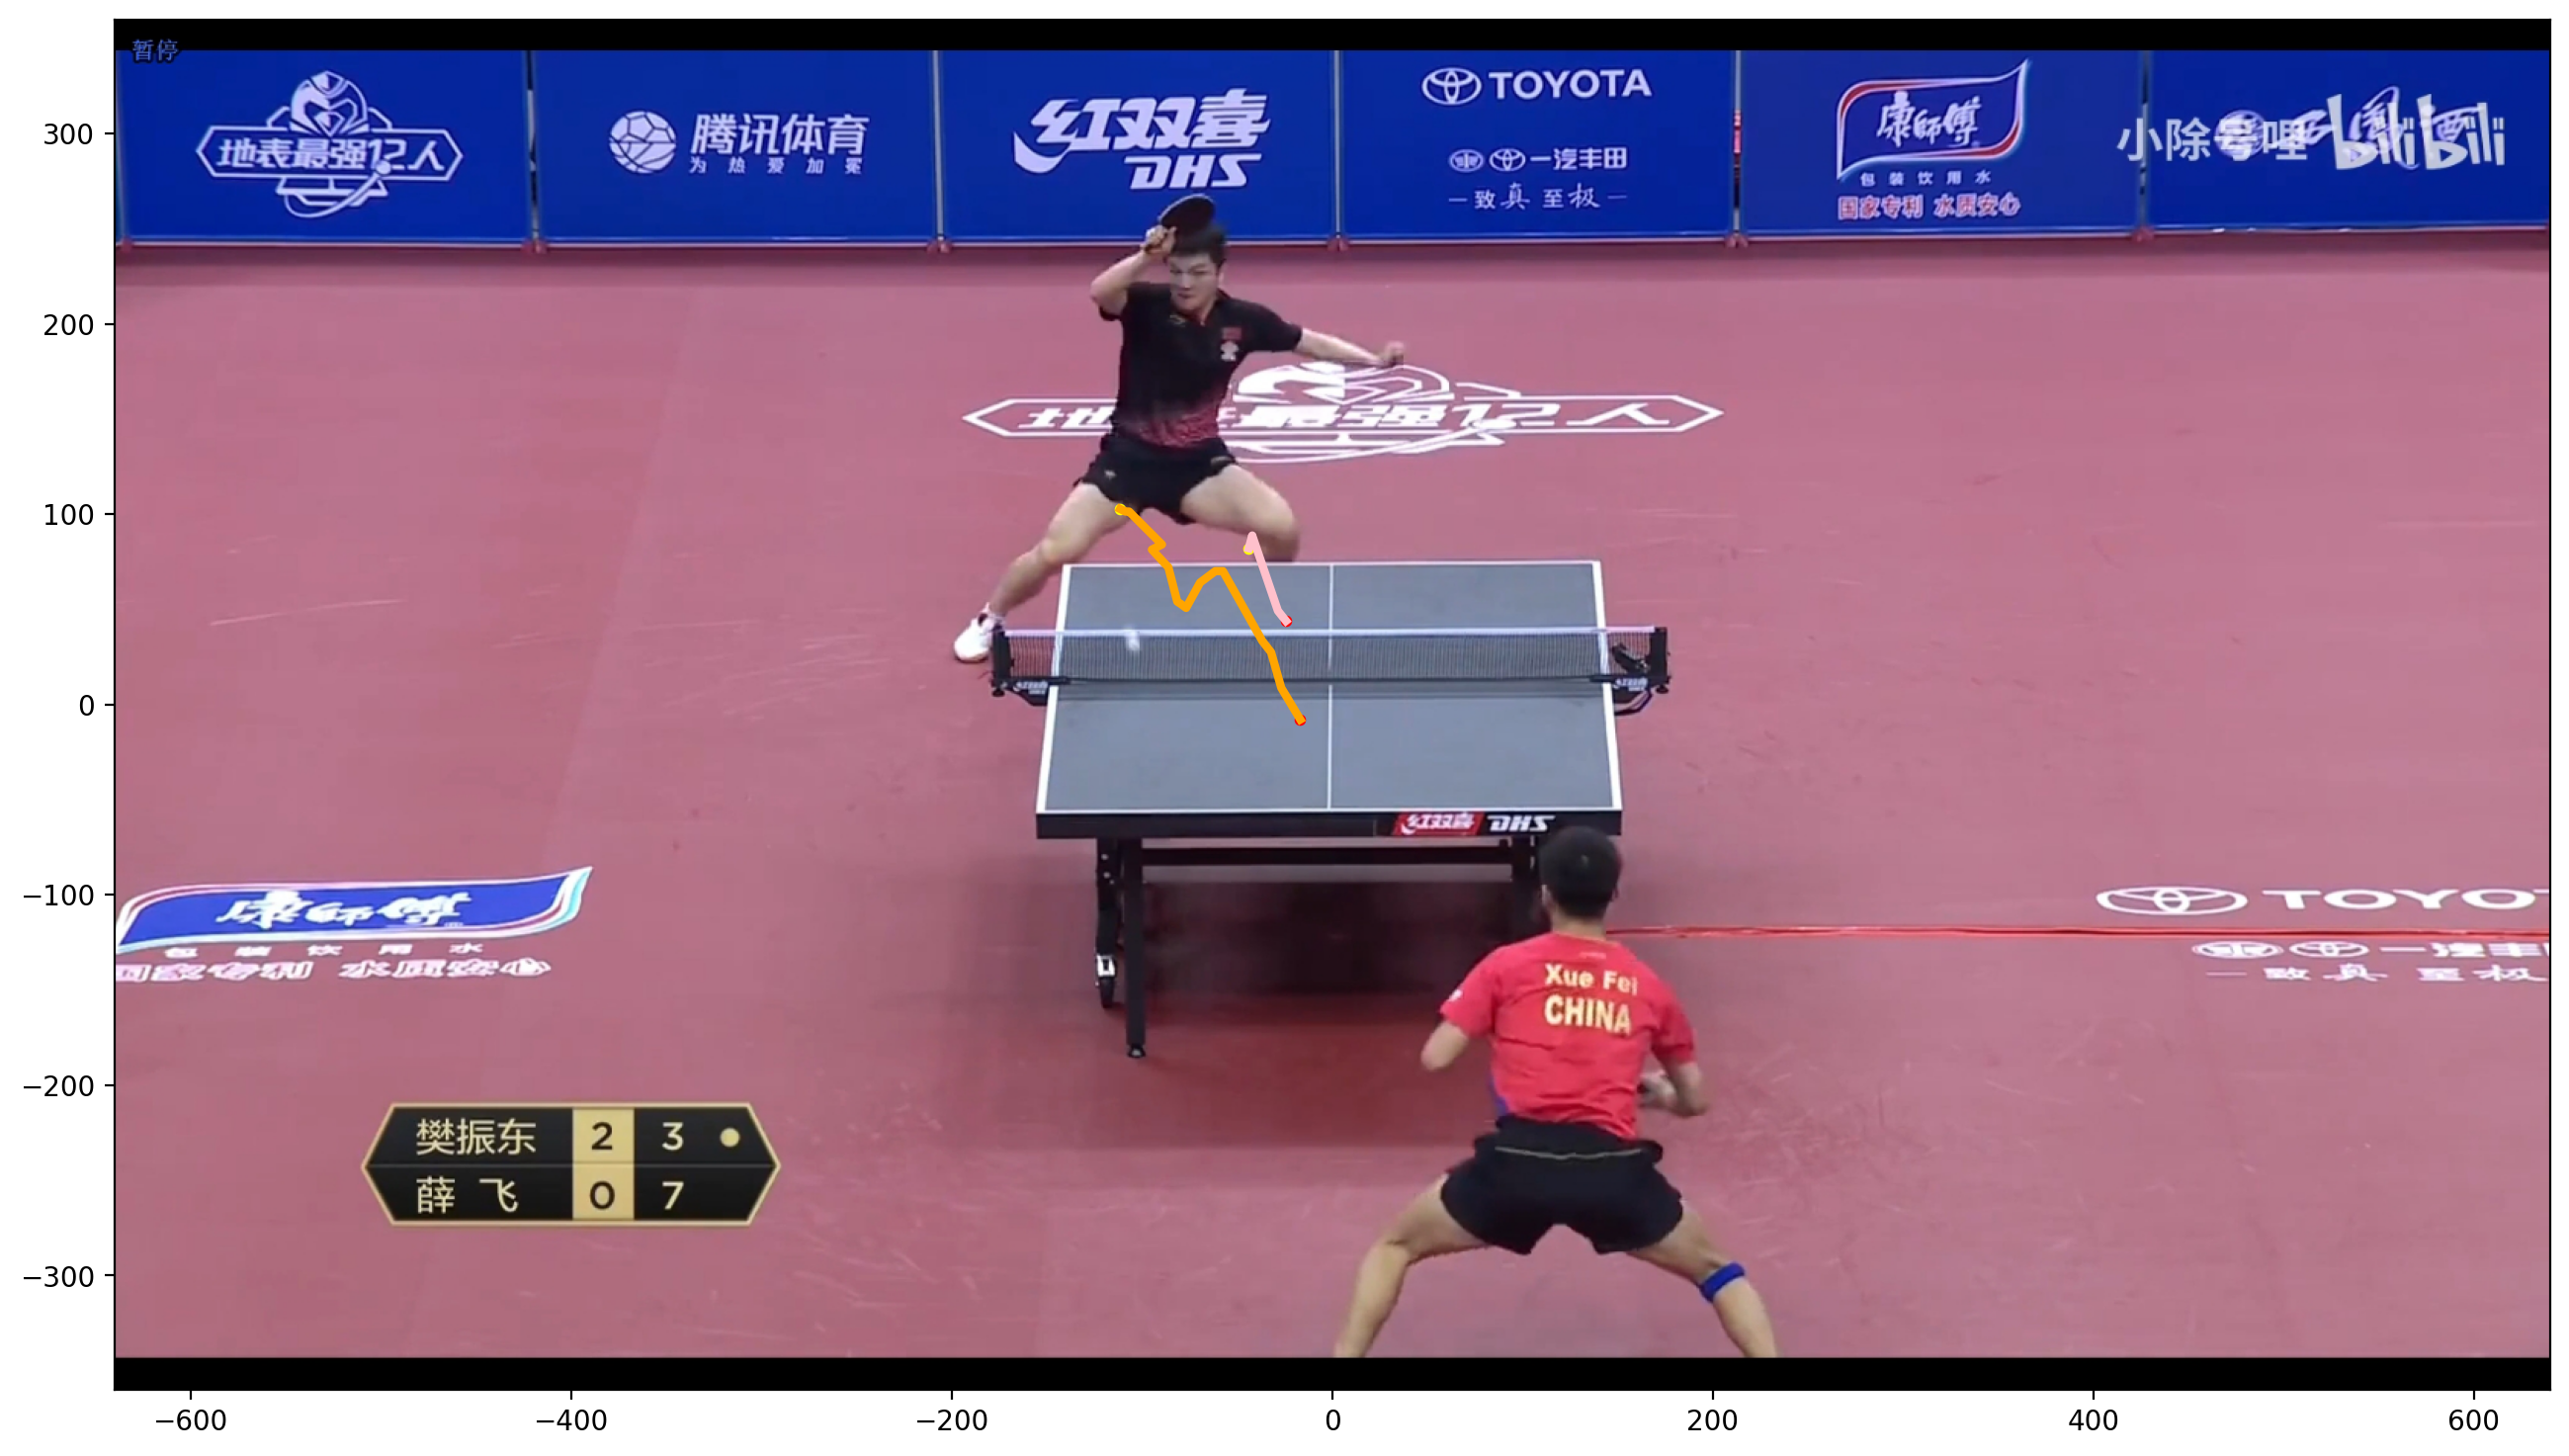

In [6]:
plt.figure(figsize=(16,9), dpi=200)
plt.plot(round_people_traj["Screen.x"], round_people_traj["Screen.y"], label="Eye", linewidth=3, c="pink")
plt.scatter(round_people_traj.iloc[0, :]["Screen.x"], round_people_traj.iloc[0, :]["Screen.y"], s=10, c="red")
plt.scatter(round_people_traj.iloc[-1, :]["Screen.x"], round_people_traj.iloc[-1, :]["Screen.y"], s=10, c="yellow")

# plt.plot(round_df["Ball.x"], round_df["Ball.y"], label="Ball Hit")
plt.plot(round_ball_traj["Ball.x"], round_ball_traj["Ball.y"], label="Ball Hit", linewidth=3, c="orange")
plt.scatter(round_ball_traj.iloc[0, :]["Ball.x"], round_ball_traj.iloc[0, :]["Ball.y"], s=10, c="red")
plt.scatter(round_ball_traj.iloc[-1, :]["Ball.x"], round_ball_traj.iloc[-1, :]["Ball.y"], s=10, c="yellow")

try:
    plt.imshow(img, extent=[-640, 640, -360, 360])
except:
    print("no gaming image")
# plt.legend( title="Gaze vs Ball\n (time order)", loc="lower left")

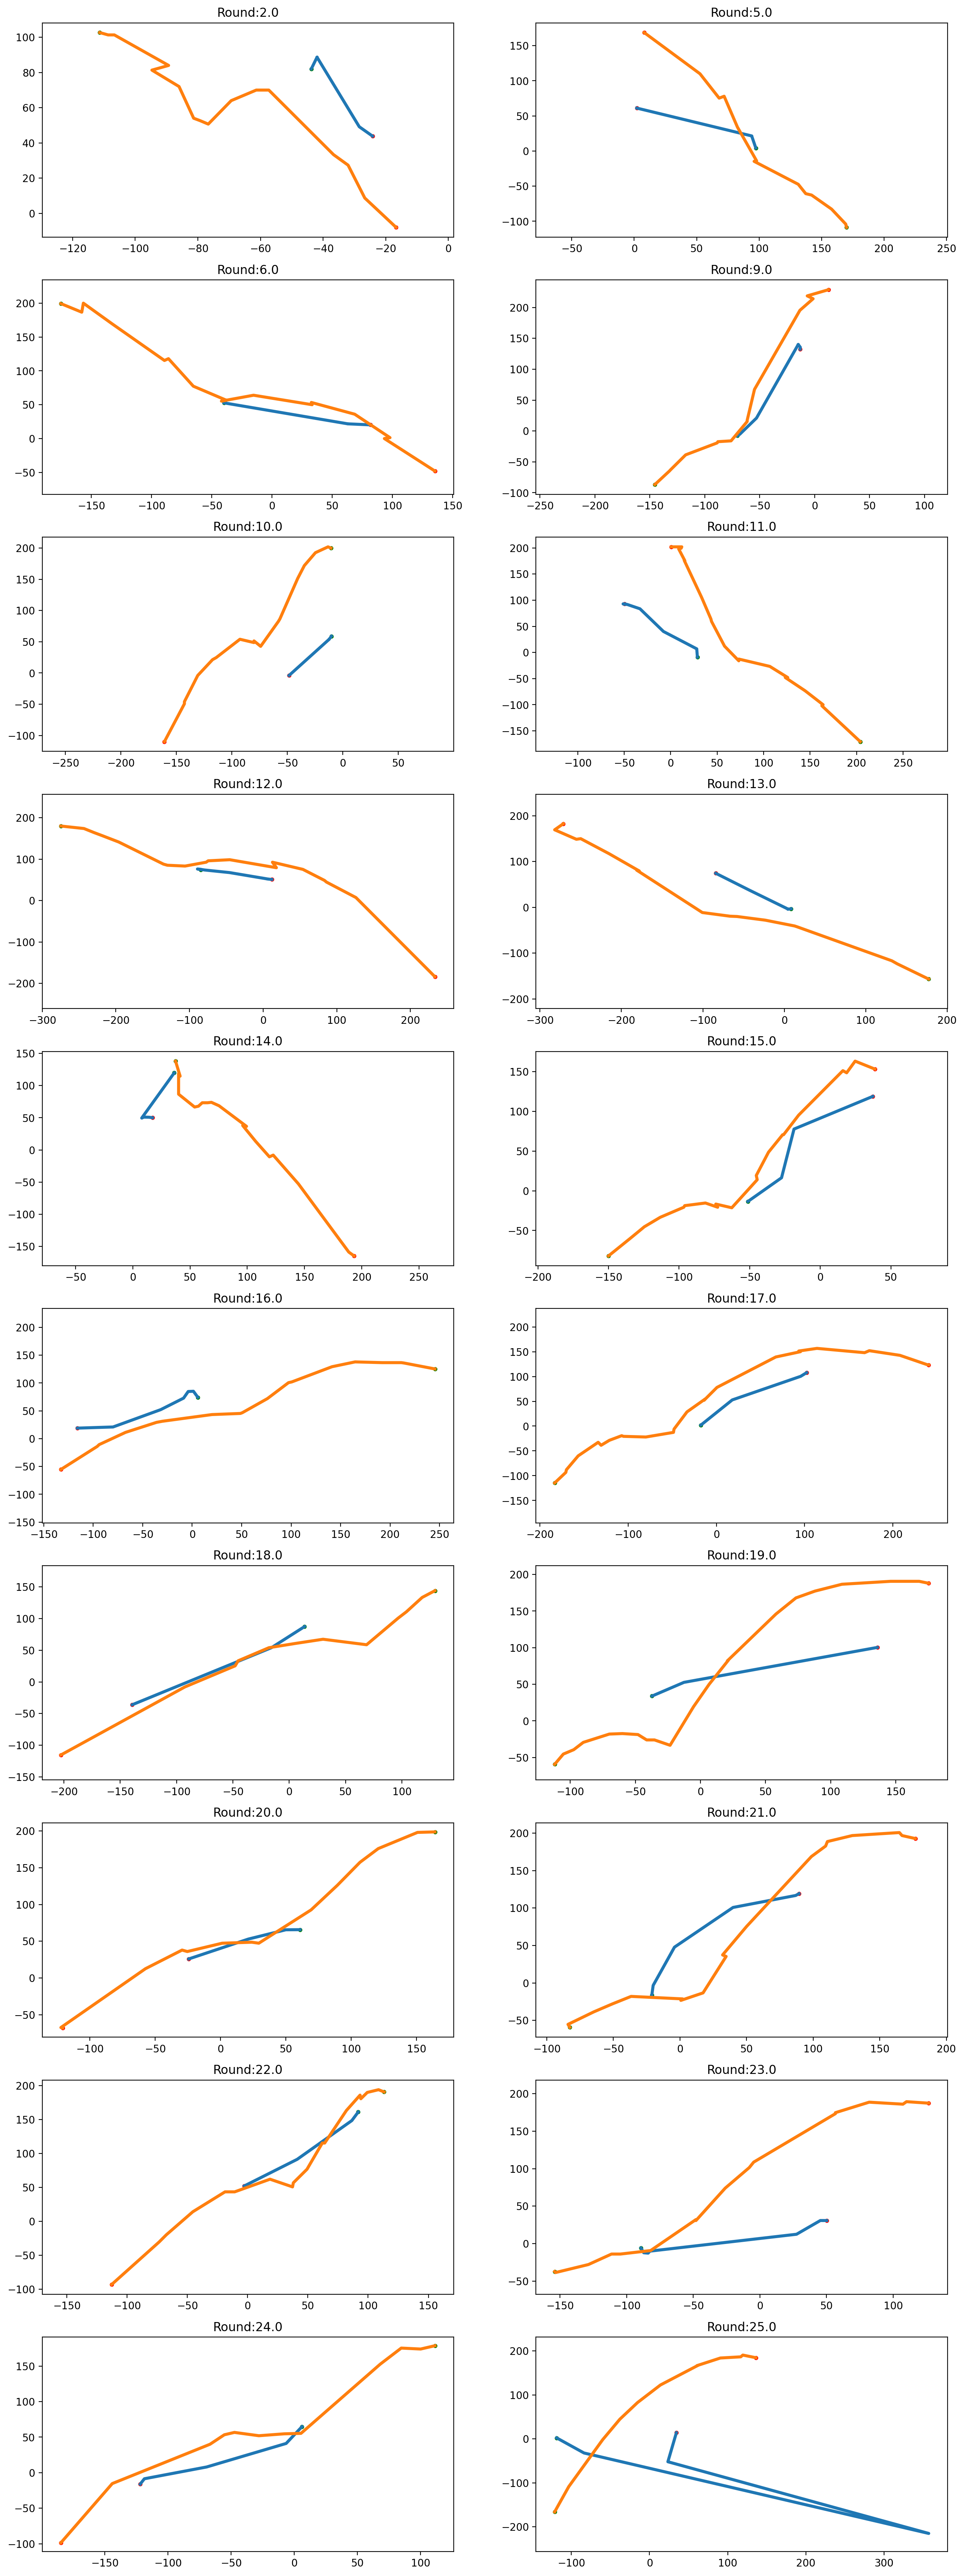

In [7]:
# plt.figure()
fig, ax=plt.subplots(nrows=int(np.ceil(len(match_rounds)/2)), ncols=2, figsize=(16,9*np.ceil(len(match_rounds.keys())/4)), dpi=200)

for idx, (round, round_indices) in enumerate(match_rounds.items()):
    _row = idx // 2
    _col = idx % 2
    
    round_ball_traj = ball_traj_df[ball_traj_df["round"]==float(round)]
    round_people_traj = people_traj_df.loc[round_indices, :]
    
    if len(match_rounds)>2:
        ax[_row, _col].plot(round_people_traj["Screen.x"], round_people_traj["Screen.y"], label="Eye", linewidth=3)
        ax[_row, _col].scatter(round_people_traj.iloc[0, :]["Screen.x"], round_people_traj.iloc[0, :]["Screen.y"], s=10, c="red")
        ax[_row, _col].scatter(round_people_traj.iloc[-1, :]["Screen.x"], round_people_traj.iloc[-1, :]["Screen.y"], s=10, c="green")

        # ax[_row, _col].plot(round_df["Ball.x"], round_df["Ball.y"], label="Ball Hit")
        ax[_row, _col].plot(round_ball_traj["Ball.x"], round_ball_traj["Ball.y"], label="Ball Hit", linewidth=3)
        ax[_row, _col].scatter(round_ball_traj.iloc[0, :]["Ball.x"], round_ball_traj.iloc[0, :]["Ball.y"], s=10, c="red")
        ax[_row, _col].scatter(round_ball_traj.iloc[-1, :]["Ball.x"], round_ball_traj.iloc[-1, :]["Ball.y"], s=10, c="green")

        # ax[_row, _col].imshow(img, extent=[-640, 640, -360, 360])
        # ax[_row, _col].set_xlim(-640, 640)
        # ax[_row, _col].set_ylim(-360, 360)
        ax[_row, _col].set_aspect(9/16, adjustable="datalim")
        # ax[_row, _col].legend( title="Gaze vs Ball\n (time order)", loc="lower left")
        # ax[_row, _col].set_title(f"Round:{round} : {round_dtw[round]}")
        ax[_row, _col].set_title(f"Round:{round}")
    else:
        ax[_col].plot(round_people_traj["Screen.x"], round_people_traj["Screen.y"], label="Eye")
        ax[_col].scatter(round_people_traj.iloc[0, :]["Screen.x"], round_people_traj.iloc[0, :]["Screen.y"], s=10, c="red")
        ax[_col].scatter(round_people_traj.iloc[-1, :]["Screen.x"], round_people_traj.iloc[-1, :]["Screen.y"], s=10, c="green")

        # ax[_col].plot(round_df["Ball.x"], round_df["Ball.y"], label="Ball Hit")
        ax[_col].plot(round_ball_traj["Ball.x"], round_ball_traj["Ball.y"], label="Ball Hit")
        ax[_col].scatter(round_ball_traj.iloc[0, :]["Ball.x"], round_ball_traj.iloc[0, :]["Ball.y"], s=10, c="red")
        ax[_col].scatter(round_ball_traj.iloc[-1, :]["Ball.x"], round_ball_traj.iloc[-1, :]["Ball.y"], s=10, c="green")

        ax[_col].imshow(img, extent=[-640, 640, -360, 360])
        # ax[_col].legend( title="Gaze vs Ball\n (time order)", loc="lower left")
        # ax[_col].set_title(f"Round:{round} : {round_dtw[round]}")
        ax[_col].set_title(f"Round:{round}")

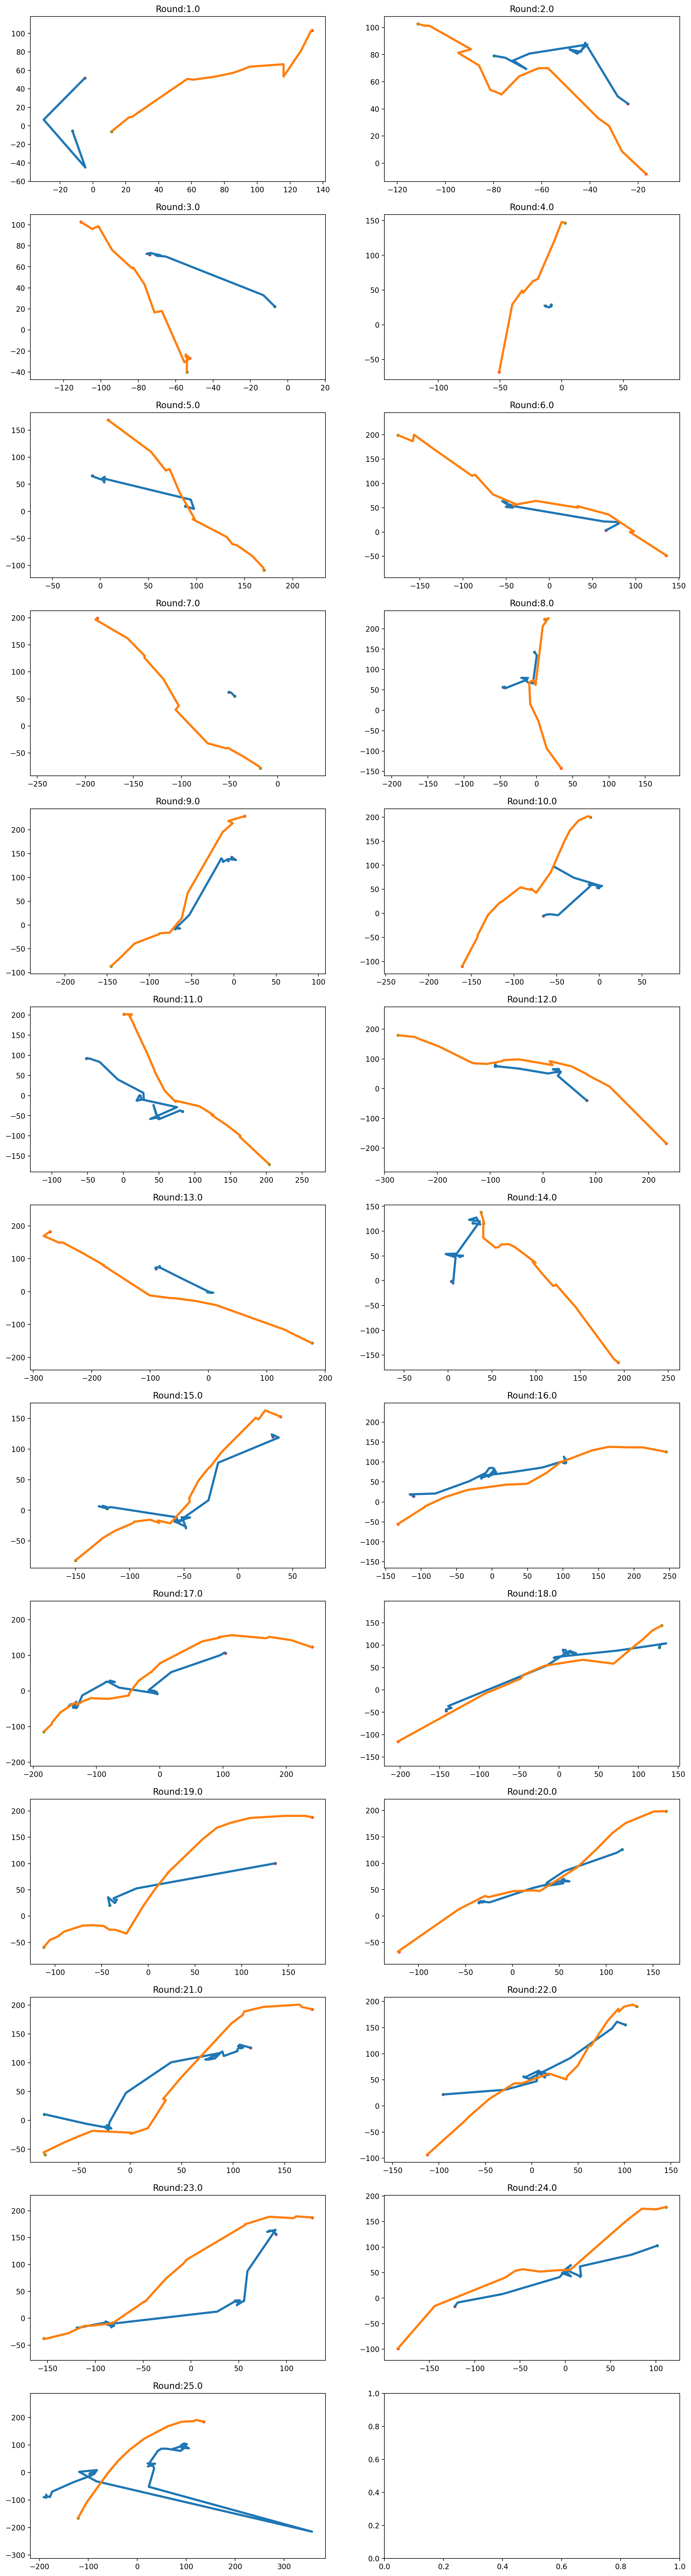

In [8]:
# plt.figure()
fig, ax=plt.subplots(nrows=int(np.ceil(len(rounds)/2)), ncols=2, figsize=(16,9*np.ceil(len(rounds.keys())/4)), dpi=200)

for idx, (round, round_indices) in enumerate(rounds.items()):
    _row = idx // 2
    _col = idx % 2
    
    round_ball_traj = ball_traj_df[ball_traj_df["round"]==float(round)]
    round_people_traj = people_traj_df.loc[round_indices, :]
    
    if len(rounds)>2:
        ax[_row, _col].plot(round_people_traj["Screen.x"], round_people_traj["Screen.y"], label="Eye", linewidth=3)
        ax[_row, _col].scatter(round_people_traj.iloc[0, :]["Screen.x"], round_people_traj.iloc[0, :]["Screen.y"], s=10, c="red")
        ax[_row, _col].scatter(round_people_traj.iloc[-1, :]["Screen.x"], round_people_traj.iloc[-1, :]["Screen.y"], s=10, c="green")

        # ax[_row, _col].plot(round_df["Ball.x"], round_df["Ball.y"], label="Ball Hit")
        ax[_row, _col].plot(round_ball_traj["Ball.x"], round_ball_traj["Ball.y"], label="Ball Hit", linewidth=3)
        ax[_row, _col].scatter(round_ball_traj.iloc[0, :]["Ball.x"], round_ball_traj.iloc[0, :]["Ball.y"], s=10, c="red")
        ax[_row, _col].scatter(round_ball_traj.iloc[-1, :]["Ball.x"], round_ball_traj.iloc[-1, :]["Ball.y"], s=10, c="green")

        # ax[_row, _col].imshow(img, extent=[-640, 640, -360, 360])
        ax[_row, _col].set_aspect(9/16, adjustable="datalim")
        # ax[_row, _col].set_xlim(-640, 640)
        # ax[_row, _col].set_ylim(-360, 360)
        # ax[_row, _col].legend( title="Gaze vs Ball\n (time order)", loc="lower left")
        # ax[_row, _col].set_title(f"Round:{round} : {round_dtw[round]}")
        ax[_row, _col].set_title(f"Round:{round}")
    else:
        ax[_col].plot(round_people_traj["Screen.x"], round_people_traj["Screen.y"], label="Eye")
        ax[_col].scatter(round_people_traj.iloc[0, :]["Screen.x"], round_people_traj.iloc[0, :]["Screen.y"], s=10, c="red")
        ax[_col].scatter(round_people_traj.iloc[-1, :]["Screen.x"], round_people_traj.iloc[-1, :]["Screen.y"], s=10, c="green")

        # ax[_col].plot(round_df["Ball.x"], round_df["Ball.y"], label="Ball Hit")
        ax[_col].plot(round_ball_traj["Ball.x"], round_ball_traj["Ball.y"], label="Ball Hit")
        ax[_col].scatter(round_ball_traj.iloc[0, :]["Ball.x"], round_ball_traj.iloc[0, :]["Ball.y"], s=10, c="red")
        ax[_col].scatter(round_ball_traj.iloc[-1, :]["Ball.x"], round_ball_traj.iloc[-1, :]["Ball.y"], s=10, c="green")

        # ax[_col].imshow(img, extent=[-640, 640, -360, 360])
        # ax[_col].legend( title="Gaze vs Ball\n (time order)", loc="lower left")
        # ax[_col].set_title(f"Round:{round} : {round_dtw[round]}")
        ax[_col].set_title(f"Round:{round}")

In [9]:
from Extractor.utils import compute_eye_move, max_circle_radius
from Extractor.TrajectoryFeatures import compute_two_traj_angle

match_rounds = {}
for _round, _round_index in rounds.items():
    temp_df = people_traj_df.loc[_round_index, :].copy()

    temp_df["sub_x"] = temp_df["Screen.x"]-temp_df["Screen.x"].shift(-1)
    temp_df["sub_y"] = temp_df["Screen.y"]-temp_df["Screen.y"].shift(-1)
    # temp_df["sub_x"] = np.round(temp_df["Screen.x"]-temp_df["Screen.x"].shift(-1))
    # temp_df["sub_y"] = np.round(temp_df["Screen.y"]-temp_df["Screen.y"].shift(-1))
    temp_indices = temp_df.index.to_list()

    ## search for where brake the line
    break_indices = []
    for i in range(1, len(temp_indices)):
        if temp_df.loc[temp_indices[i], "sub_x"] * temp_df.loc[temp_indices[i-1], "sub_x"] < 0:
            if temp_df.loc[temp_indices[i], "sub_y"] * temp_df.loc[temp_indices[i-1], "sub_y"] > 0:
                if abs(temp_df.loc[temp_indices[i-1], "sub_x"]) > 2:
                    break_indices.append(temp_indices[i])
            else:
                break_indices.append(temp_indices[i])
        if temp_df.loc[temp_indices[i], "sub_y"] * temp_df.loc[temp_indices[i-1], "sub_y"] < 0:
            if temp_df.loc[temp_indices[i], "sub_x"] * temp_df.loc[temp_indices[i-1], "sub_x"] > 0:
                if abs(temp_df.loc[temp_indices[i-1], "sub_y"]) > 2:
                    break_indices.append(temp_indices[i])
            else:
                break_indices.append(temp_indices[i])
    break_indices = list(set(break_indices))
    break_indices.sort()

    ## use max length of single direction line
    max_dist = -1
    _indices = []
    for idx, end_index in enumerate(break_indices):
        if idx==0:
            start_index=temp_indices[0]
        else:
            start_index=break_indices[idx-1]
        dist = compute_eye_move(temp_df.loc[start_index:end_index])
        if dist > max_dist:
            max_dist = dist
            _indices = temp_df.loc[start_index:end_index].index.to_list()

    if len(_indices)==0: continue
    # test if the line is longer enough
    max_dist = max_circle_radius(temp_df.loc[_indices, :]) * 2
    # test if the angle match
    angle = compute_two_traj_angle(
        eye_traj=temp_df.loc[_indices, ["Screen.x", "Screen.y"]].copy(),
        ball_traj=ball_traj_df[ball_traj_df["round"]==float(_round)].copy()
    )
    if max_dist >= 58 and angle <= 60:
        match_rounds[_round] = _indices

In [10]:
match_rounds

{'2.0': [60, 61, 62],
 '5.0': [148, 149, 150, 151, 152],
 '6.0': [164, 165, 166, 167, 168, 169],
 '8.0': [241, 242],
 '9.0': [253, 254, 255, 256],
 '10.0': [276, 277],
 '11.0': [305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317],
 '12.0': [339, 340],
 '13.0': [389, 390, 391, 392, 393, 394],
 '14.0': [423, 424, 425, 426, 427, 428, 429],
 '15.0': [441, 442, 443, 444],
 '16.0': [478, 479, 480, 481, 482, 483, 484],
 '17.0': [502, 503, 504, 505, 506],
 '18.0': [551, 552, 553],
 '19.0': [586, 587, 588],
 '20.0': [631, 632, 633, 634, 635],
 '21.0': [662, 663, 664, 665, 666, 667],
 '22.0': [703, 704, 705, 706],
 '23.0': [724, 725, 726, 727, 728],
 '24.0': [745, 746, 747, 748, 749, 750],
 '25.0': [782, 783, 784, 785, 786, 787, 788, 789, 790]}

In [11]:
test = people_traj_df.loc[match_rounds["8.0"], :]

test["sub_x"] = test["Screen.x"]-test["Screen.x"].shift(-1)
test["sub_y"] = test["Screen.y"]-test["Screen.y"].shift(-1)
test

Screen.x   Screen.y  LeftPupil  RightPupil  frame     sub_x     sub_y
241 -4.907347   65.78363   4.022349    3.364367    241 -5.294338 -69.35277
242  0.386991  135.13640   4.246753    3.289331    242       NaN       NaN

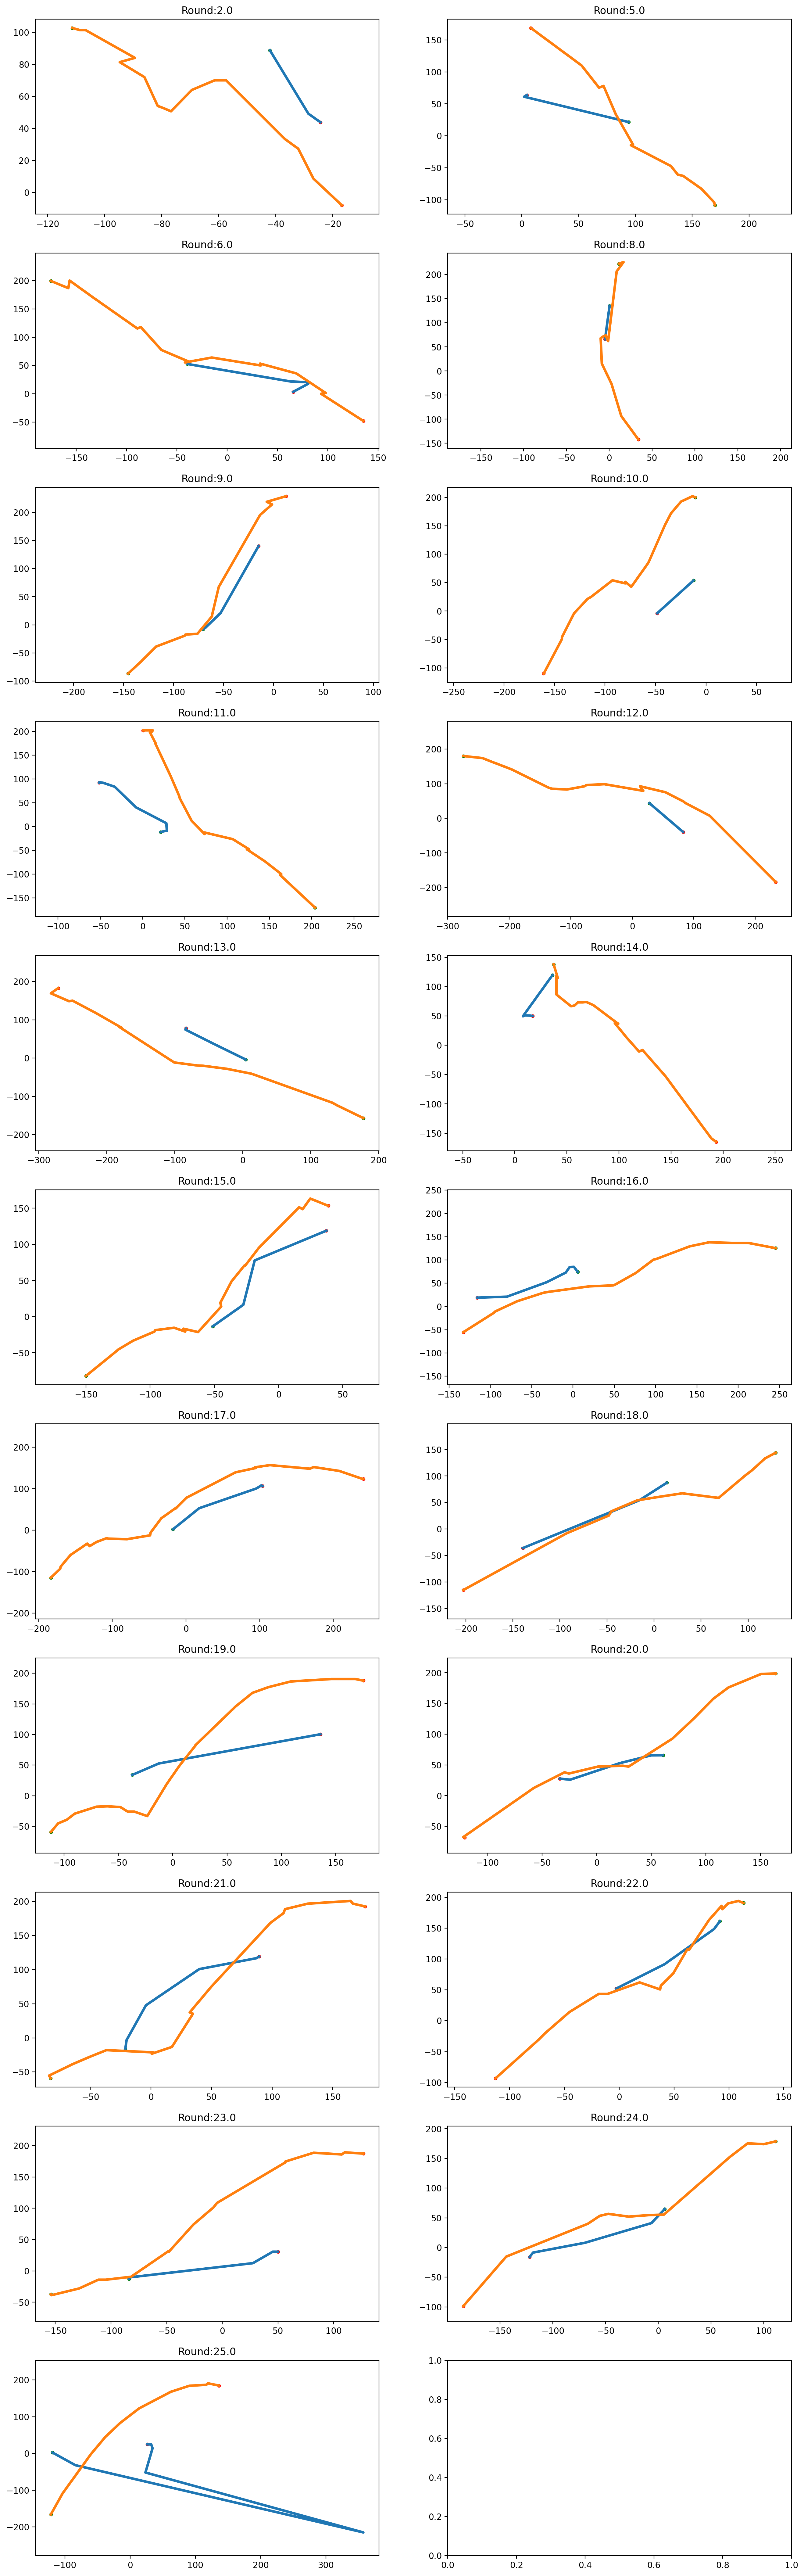

In [12]:
# plt.figure()
fig, ax=plt.subplots(nrows=int(np.ceil(len(match_rounds)/2)), ncols=2, figsize=(16,9*np.ceil(len(match_rounds.keys())/4)), dpi=200)

for idx, (round, round_indices) in enumerate(match_rounds.items()):
    _row = idx // 2
    _col = idx % 2
    
    round_ball_traj = ball_traj_df[ball_traj_df["round"]==float(round)]
    round_people_traj = people_traj_df.loc[round_indices, :]
    
    if len(match_rounds)>2:
        ax[_row, _col].plot(round_people_traj["Screen.x"], round_people_traj["Screen.y"], label="Eye", linewidth=3)
        ax[_row, _col].scatter(round_people_traj.iloc[0, :]["Screen.x"], round_people_traj.iloc[0, :]["Screen.y"], s=10, c="red")
        ax[_row, _col].scatter(round_people_traj.iloc[-1, :]["Screen.x"], round_people_traj.iloc[-1, :]["Screen.y"], s=10, c="green")

        # ax[_row, _col].plot(round_df["Ball.x"], round_df["Ball.y"], label="Ball Hit")
        ax[_row, _col].plot(round_ball_traj["Ball.x"], round_ball_traj["Ball.y"], label="Ball Hit", linewidth=3)
        ax[_row, _col].scatter(round_ball_traj.iloc[0, :]["Ball.x"], round_ball_traj.iloc[0, :]["Ball.y"], s=10, c="red")
        ax[_row, _col].scatter(round_ball_traj.iloc[-1, :]["Ball.x"], round_ball_traj.iloc[-1, :]["Ball.y"], s=10, c="green")

        # ax[_row, _col].imshow(img, extent=[-640, 640, -360, 360])
        # ax[_row, _col].set_xlim(-640, 640)
        # ax[_row, _col].set_ylim(-360, 360)
        ax[_row, _col].set_aspect(9/16, adjustable="datalim")
        # ax[_row, _col].legend( title="Gaze vs Ball\n (time order)", loc="lower left")
        # ax[_row, _col].set_title(f"Round:{round} : {round_dtw[round]}")
        ax[_row, _col].set_title(f"Round:{round}")
    else:
        ax[_col].plot(round_people_traj["Screen.x"], round_people_traj["Screen.y"], label="Eye")
        ax[_col].scatter(round_people_traj.iloc[0, :]["Screen.x"], round_people_traj.iloc[0, :]["Screen.y"], s=10, c="red")
        ax[_col].scatter(round_people_traj.iloc[-1, :]["Screen.x"], round_people_traj.iloc[-1, :]["Screen.y"], s=10, c="green")

        # ax[_col].plot(round_df["Ball.x"], round_df["Ball.y"], label="Ball Hit")
        ax[_col].plot(round_ball_traj["Ball.x"], round_ball_traj["Ball.y"], label="Ball Hit")
        ax[_col].scatter(round_ball_traj.iloc[0, :]["Ball.x"], round_ball_traj.iloc[0, :]["Ball.y"], s=10, c="red")
        ax[_col].scatter(round_ball_traj.iloc[-1, :]["Ball.x"], round_ball_traj.iloc[-1, :]["Ball.y"], s=10, c="green")

        ax[_col].imshow(img, extent=[-640, 640, -360, 360])
        # ax[_col].legend( title="Gaze vs Ball\n (time order)", loc="lower left")
        # ax[_col].set_title(f"Round:{round} : {round_dtw[round]}")
        ax[_col].set_title(f"Round:{round}")